**Data Wrangling - Proyecto Data Science - CoderHouse - Comision 46270**    
Tutor: Juan Cruz Alric
Profesor: Ximena Lisouski

In [1]:
#Importar la bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Leer el archivo csv
df = pd.read_csv('Airline Dataset.csv')

In [3]:
#Limpeiza de datos

#Paso 1: Limpiar los datos
#Eliminar las filas con valores nulos
df = df.dropna()

#Reemplazar los valores erróneos (por ejemplo, reemplazar 'N/A' por 'Desconocido')
df = df.replace('N/A', 'Desconocido')

In [4]:
#Paso 2: Ordenar los datos
#Ordenar por una columna (por ejemplo, 'Edad')
df = df.sort_values('Passenger ID')

# Imprimir el DataFrame limpio y ordenado
print(df)

       Passenger ID First Name    Last Name  Gender  Age  \
51819         10000      Duffy   Stanbridge    Male   58   
58138         10000       Anny      Kernell  Female   42   
55898         10000     Mickie       Campey  Female   57   
33272         10000       Myer        Lippi    Male   66   
77791         10001       Essa      Colvine  Female   70   
...             ...        ...          ...     ...  ...   
62026         99997        Dru  Wholesworth  Female   61   
5750          99999      Tiler     Whittuck    Male   58   
93324         99999      Bliss     Slatford  Female    3   
43021         99999    Heloise      Rehorek  Female   58   
44752         99999    Rhiamon     Narducci  Female   51   

                 Nationality                       Airport Name  \
51819                 Guinea                    Kalokol Airport   
58138                 Sweden                   Hakodate Airport   
55898  Palestinian Territory                      Colac Airport   
33272      

In [5]:
#Identificar duplicados en el conjunto de datos
duplicates = df[df.duplicated()]

In [6]:
#Eliminar duplicados del conjunto de datos
df = df.drop_duplicates()

In [7]:
#Ver información general sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 98619 entries, 51819 to 44752
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage:

In [8]:
#Visualizar las primeras 10 filas del conjunto de datos
print(df.head(10))

       Passenger ID First Name   Last Name  Gender  Age  \
51819         10000      Duffy  Stanbridge    Male   58   
58138         10000       Anny     Kernell  Female   42   
55898         10000     Mickie      Campey  Female   57   
33272         10000       Myer       Lippi    Male   66   
77791         10001       Essa     Colvine  Female   70   
28501         10001      Lanae   Bonallick  Female   12   
62557         10002    Kirstyn    Steggals  Female   53   
79187         10003     Norman     Huyhton    Male    8   
4091          10003      Adela       Freyn  Female   43   
90566         10004   Hercules       Roman    Male   31   

                 Nationality                 Airport Name  \
51819                 Guinea              Kalokol Airport   
58138                 Sweden             Hakodate Airport   
55898  Palestinian Territory                Colac Airport   
33272                Morocco       Ngjiva Pereira Airport   
77791                  China        Sehwan Sh

In [9]:
#Ver estadísticas descriptivas del DataFrame
print(df.describe())

       Passenger ID           Age
count  98619.000000  98619.000000
mean   55168.689522     45.504021
std    25985.443696     25.929849
min    10000.000000      1.000000
25%    32608.000000     23.000000
50%    55338.000000     46.000000
75%    77695.000000     68.000000
max    99999.000000     90.000000


In [10]:
#Ver la cantidad de valores únicos en cada columna
for column in df.columns:
    print(f'{column}: {df[column].nunique()} valores únicos')

Passenger ID: 59871 valores únicos
First Name: 8437 valores únicos
Last Name: 41658 valores únicos
Gender: 2 valores únicos
Age: 90 valores únicos
Nationality: 240 valores únicos
Airport Name: 9062 valores únicos
Airport Country Code: 235 valores únicos
Country Name: 235 valores únicos
Airport Continent: 6 valores únicos
Continents: 6 valores únicos
Departure Date: 364 valores únicos
Arrival Airport: 9024 valores únicos
Pilot Name: 98610 valores únicos
Flight Status: 3 valores únicos


**ANALISIS EXPLORATORIO**

In [11]:
#Calcular la distribución de edad
age_distribution = df['Age'].value_counts().sort_index()

#Calcular la distribución de género
gender_distribution = df['Gender'].value_counts()

#Calcular la distribución por nacionalidad
nationality_distribution = df['Nationality'].value_counts()

#Imprimir las distribuciones
print('Distribución de Edad:')
print(age_distribution)
print('\nDistribución de Género:')
print(gender_distribution)
print('\nDistribución por Nacionalidad:')
print(nationality_distribution)

Distribución de Edad:
Age
1     1075
2     1058
3     1095
4     1110
5     1082
      ... 
86    1068
87    1064
88    1069
89    1131
90    1076
Name: count, Length: 90, dtype: int64

Distribución de Género:
Gender
Male      49598
Female    49021
Name: count, dtype: int64

Distribución por Nacionalidad:
Nationality
China             18317
Indonesia         10559
Russia             5693
Philippines        5239
Brazil             3791
                  ...  
Saint Helena          2
Cook Islands          2
Norfolk Island        1
Sint Maarten          1
Jersey                1
Name: count, Length: 240, dtype: int64


In [12]:
#Calcular los aeropuertos más populares para salidas
departure_airports = df['Airport Name'].value_counts()

#Calcular los aeropuertos más populares para llegadas
arrival_airports = df['Arrival Airport'].value_counts()

#Imprimir los aeropuertos más populares para salidas y llegadas
print('Aeropuertos más populares para salidas:')
print(departure_airports)
print('\nAeropuertos más populares para llegadas:')
print(arrival_airports)

Aeropuertos más populares para salidas:
Airport Name
San Pedro Airport             43
Santa Maria Airport           38
Böblingen Flugfeld            36
Santa Ana Airport             35
San Fernando Airport          31
                              ..
Smolensk North Airport         2
Juba International Airport     2
J F Mitchell Airport           2
Hiroshima Airport              1
Falcon State Airport           1
Name: count, Length: 9062, dtype: int64

Aeropuertos más populares para llegadas:
Arrival Airport
0      873
JNB     37
PHM     36
MPT     32
YTY     27
      ... 
BQU      2
MGB      2
IPI      2
FAL      1
HIJ      1
Name: count, Length: 9024, dtype: int64


In [13]:
#Agrupar por continente y calcular los aeropuertos más populares para salidas
continent_departure_airports = df.groupby('Airport Continent')['Airport Name'].value_counts()

#Agrupar por país y calcular los aeropuertos más populares para salidas
country_departure_airports = df.groupby('Country Name')['Airport Name'].value_counts()

#Imprimir los resultados
print('Aeropuertos más populares para salidas por continente:')
print(continent_departure_airports)
print('\nAeropuertos más populares para salidas por país:')
print(country_departure_airports)

Aeropuertos más populares para salidas por continente:
Airport Continent  Airport Name                          
AF                 OR Tambo International Airport            23
                   Bangassou Airport                         23
                   Mampikony Airport                         23
                   Xai-Xai Airport                           22
                   Lumbala Airport                           21
                                                             ..
SAM                Ouro Fino Airport                          4
                   Perai Tepuy Airport                        3
                   Jorge Wilsterman International Airport     3
                   Teniente Coronel Rafael Pabón Airport      3
                   San Luis Airport                           2
Name: count, Length: 9091, dtype: int64

Aeropuertos más populares para salidas por país:
Country Name  Airport Name                        
Afghanistan   Zaranj Airport              

In [14]:
#Convertir la columna 'Fecha de salida' a datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

#Crear nuevas columnas para el día de la semana y el mes
df['Día de la semana'] = df['Departure Date'].dt.day_name()
df['Mes'] = df['Departure Date'].dt.month_name()

#Calcular los días de la semana más populares para viajar
dias_populares = df['Día de la semana'].value_counts()

#Calcular los meses más populares para viajar
meses_populares = df['Mes'].value_counts()

#Imprimir los resultados
print('Días de la semana más populares para viajar:')
print(dias_populares)
print('\nMeses más populares para viajar:')
print(meses_populares)


Días de la semana más populares para viajar:
Día de la semana
Sunday       14289
Thursday     14227
Friday       14227
Tuesday      14048
Monday       14032
Wednesday    13939
Saturday     13857
Name: count, dtype: int64

Meses más populares para viajar:
Mes
August       8544
May          8496
July         8451
March        8431
January      8416
October      8415
September    8149
June         8128
November     8053
April        7959
December     7924
February     7653
Name: count, dtype: int64


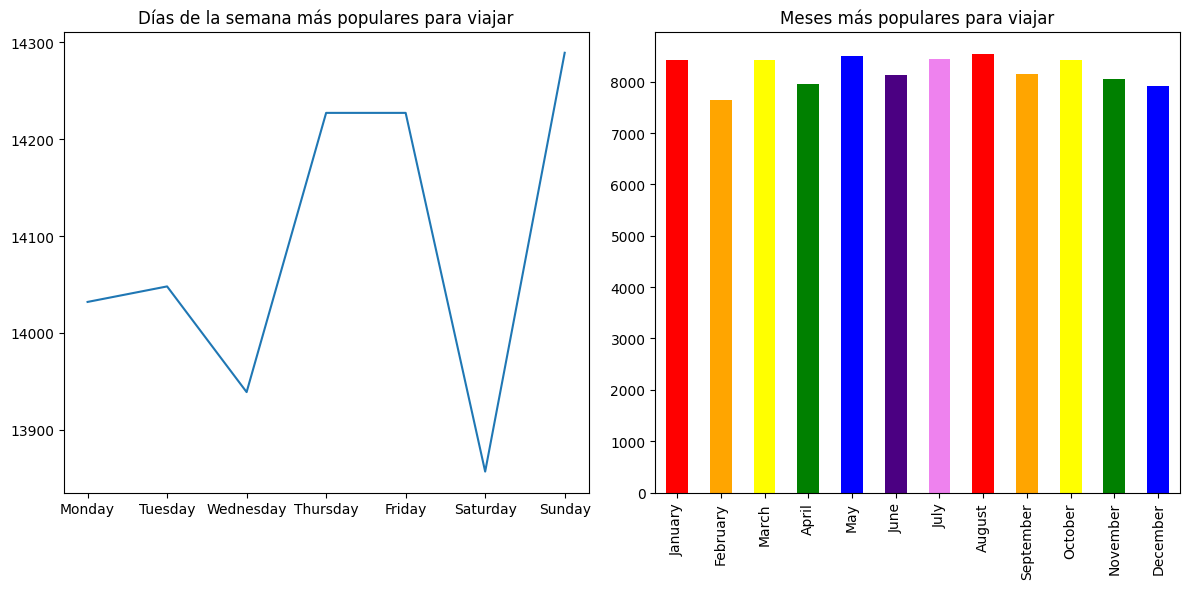

In [15]:
#Convertir la columna 'Fecha de salida' a datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

#Crear nuevas columnas para el día de la semana y el mes
df['Día de la semana'] = df['Departure Date'].dt.dayofweek
df['Mes'] = df['Departure Date'].dt.month

#Calcular los días de la semana más populares para viajar
dias_populares = df['Día de la semana'].value_counts().sort_index()
dias_populares.index = [calendar.day_name[i] for i in range(7)]  # Reemplazar los números por nombres de días

#Calcular los meses más populares para viajar
meses_populares = df['Mes'].value_counts().sort_index()
meses_populares.index = [calendar.month_name[i] for i in range(1, 13)]  # Reemplazar los números por nombres de meses

#Definir una lista de colores
colores = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

#Asegurarse de que la lista de colores tenga la misma longitud que los datos
colores = colores * (len(meses_populares) // len(colores)) + colores[:len(meses_populares) % len(colores)]

#Graficar los resultados
plt.figure(figsize=(12, 6))

#Gráfico lineal para los días de la semana
plt.subplot(1, 2, 1)
dias_populares.plot(kind='line', title='Días de la semana más populares para viajar')

#Gráfico de barras para los meses con colores personalizados
plt.subplot(1, 2, 2)
meses_populares.plot(kind='bar', color=colores, title='Meses más populares para viajar')

plt.tight_layout()
plt.show()

